# This is a simple test for image segmentation using histograms

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io

In [5]:
img = img_as_float(io.imread('/data/sara/sara.jpg'))

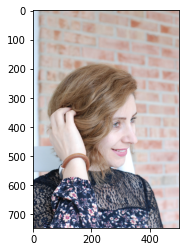

In [7]:
plt.imshow(img)

In [9]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0.Please use `channel_axis` instead.
  """Entry point for launching an IPython kernel.


In [12]:
denoise = denoise_nl_means(img, h=1.15*sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)

In [13]:
denoise_ubyte = img_as_ubyte(denoise)

(array([ 17867.,  53635.,  70251.,  80795.,  78120.,  69048., 142408.,
        324077., 220590.,  63709.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

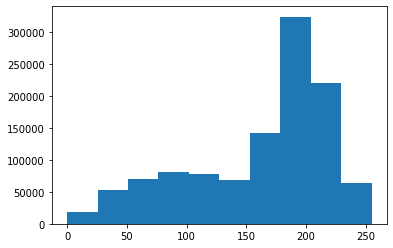

In [45]:
plt.hist(denoise_ubyte.flat)

In [16]:
segm1 = (denoise_ubyte <= 150)
segm2 = (denoise_ubyte > 150)

In [25]:
all_segm = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1],3))

In [26]:
denoise_ubyte.shape

(747, 500, 3)

In [27]:
all_segm.shape

(747, 500, 3)

In [39]:
all_segm[segm1] = 1
all_segm[segm2] = 0

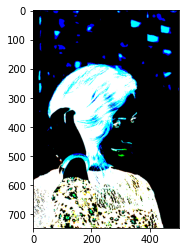

In [40]:
plt.imshow(all_segm)

In [41]:
from scipy import ndimage as nd

In [46]:
#nd.binary_opening(segm1, np.ones((3,3)))

In [32]:
np.unique(segm1)

array([False,  True])

In [34]:
np.where(segm1== True)

(array([  0,   0,   0, ..., 746, 746, 746]),
 array([ 24,  25,  26, ..., 446, 446, 446]),
 array([2, 2, 2, ..., 0, 1, 2]))

In [37]:
segm1[0, 24, 2]

True